# Statistics on the corpus

The corpus comes from the digitized newspaper collections of the [Latvian National Library (LNB)](http://periodika.lv/)

- Time: 1800-1900
- Language: German
- Keywords: "Sturm", "Hagel", "Überscwhemmung" (storm, hail, flood)
- Created by searching for articles that contain ANY of the keywords

This notebook presents first statistics regarding the number of entries, their temporal distribution, different periodicals etc.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib
import seaborn as sns
from climdist.utils import load_df
import matplotlib.font_manager as fm

In [30]:
fm.fontManager.addfont('../references/cmunorm.ttf')
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14)
matplotlib.rcParams['font.family'] = 'CMU Concrete'

In [38]:
df = load_df('main')

In [7]:
df.head()

,date,year,month,day,pub,heading,full_text,href,text_len,placename,origin_date,heading2,readability
0,1802-01-01,1802,1,1,Rigasche Zeitung,"St. Petersburg, den 20. Decemb.","St. Petersburg, den 20. Decemb.\n\n\tAuf Aller...",https://proc.dom.lndb.lv/file.axd?id=3377815&a...,2067,St. Petersburg,20,St. Petersburg,1
1,1802-01-01,1802,1,1,Rigasche Zeitung,"Paris, den 18ten December.","Paris, den 18ten December.\n\n\tDer Oberconsu!...",https://proc.dom.lndb.lv/file.axd?id=3377818&a...,3664,Paris,18,Paris,1
2,1802-01-01,1802,1,1,Rigasche Zeitung,"Haag, den 22sten December.","Haag, den 22sten December.\n\n\tIn kurzem erwa...",https://proc.dom.lndb.lv/file.axd?id=3377819&a...,967,Haag,22,Haag,1
3,1802-01-01,1802,1,1,Rigasche Zeitung,"Zürich, den 16ten December.","Zürich, den 16ten December.\n\n\tDie durch die...",https://proc.dom.lndb.lv/file.axd?id=3377822&a...,482,Zürich,16,Zürich,1
4,1802-01-01,1802,1,1,Rigasche Zeitung,"Wien, den 19ten December.","Wien, den 19ten December.\n\n\tDie Malcheser-N...",https://proc.dom.lndb.lv/file.axd?id=3377823&a...,1154,Wien,19,Wien,1


In [8]:
figsize = (15,7)
bins = range(min(df.year), max(df.year)+2)
ticksrange = np.arange(1802,1890)
xlabels = [num if num%5==0 else '' for num in np.arange(1802,1890)]

## Distribution histogram

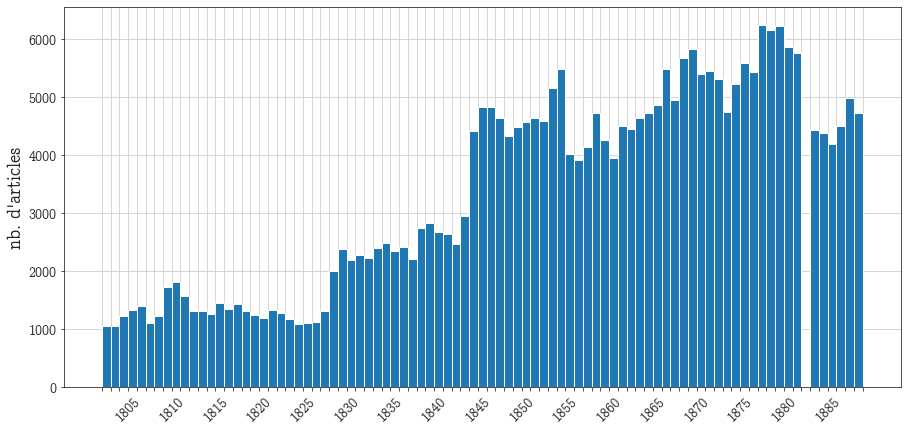

In [12]:
matplotlib.rcParams['font.family'] = 'CMU Concrete'

plt.figure(figsize=figsize)
plt.hist(df.year,bins=bins)
plt.grid(b=True, which='both')
plt.yticks(fontsize=14)
plt.xticks(ticks=ticksrange, labels=xlabels, fontsize=14)
plt.tick_params(axis ='x', rotation = 45)
#plt.title('Distribution temporelle des données', fontsize=20)
plt.ylabel("nb. d'articles", fontsize=18)
sns.set_style(style='whitegrid')

plt.savefig('../references/memoire/images/articles_histogram.pdf', bbox_inches='tight')

plt.show()

## OCR readability

In [67]:
## example for table in text

ocr_quality_example = df[df.full_text.str.contains('W i t t e f u n g.') == True].index
ocr_quality_text = df.iloc[ocr_quality_example].full_text.values[0]
print(ocr_quality_text)

Witterungs – Beobachtungen. (Varom.-Beob. im Zimmer bei + 15°, 2.)

	orgenS. ittagS. . !
Abends.
W i t t e f u n g.
Oki
ОЩу. ! Barometer, l  Barometer, i J Promoter. | Therm, j ~20 \2%/,-3"lA\* 6°Дк''~ A''',o\&gt;h 7°/6&gt;28"-  WNW. Bewölkt. 21 |28 — 4 /0!+ 2 /7|28 — 3 ,9l&gt;i&lt; 4 /8,28 — 3 ,&lt;M 5 д! WNW. Regen, Nebel. 22 !28 — 1 ,2№ 5 /0|28 — о ,4|* 7 /6|27 — ll  6 ,о! SSW. Bewölkt/ trübe. SZ. !27 —-10 ,o№ 5 ,0127 /Oi&gt;j&lt; 5/5127 —11 ,0j+4 ,8| SSO. Bewölkt/ Regen. ibr.
iavometev. \ Therm, j Vavomerer. I Therm
j Barometer.

	Oki

	ibr.

	iavometev. \ Therm, j Vavomerer.

	ОЩу. ! Barometer, l  Barometer, i J Promoter. | Therm, j
~20 \2%/,-3"lA\* 6°Дк''~ A''',o\&gt;h 7°/6&gt;28"-  WNW. Bewölkt.
21 |28 — 4 /0!+ 2 /7|28 — 3 ,9l&gt;i&lt; 4 /8,28 — 3 ,&lt;M 5 д! WNW. Regen, Nebel.
22 !28 — 1 ,2№ 5 /0|28 — о ,4|* 7 /6|27 — ll  6 ,о! SSW. Bewölkt/ trübe. SZ. !27 —-10 ,o№ 5 ,0127 /Oi&gt;j&lt; 5/5127 —11 ,0j+4 ,8| SSO. Bewölkt/ Regen.

	orgenS.

	ittagS.

	I Therm

	. !

	Abends.

	j B

In [192]:
print(f'Number of illisible texts is {len(df[df.readability==False])}, or about {(round(len(df[df.readability==False])/len(df),2))*100}%')

Number of illisible texts is 32709, or about 11.0%


In [87]:
non_readable = df.year[df.readability==False].value_counts(sort=False)
non_readable.loc[1808] = 0
non_readable.sort_index(inplace=True)
readable = df.year[df.readability==True].value_counts(sort=False)

readability_df = pd.crosstab(df.year, df.readability)

ax1.hist(x, n_bins, density=True, histtype='bar', stacked=True)
ax1.set_title('stacked bar')

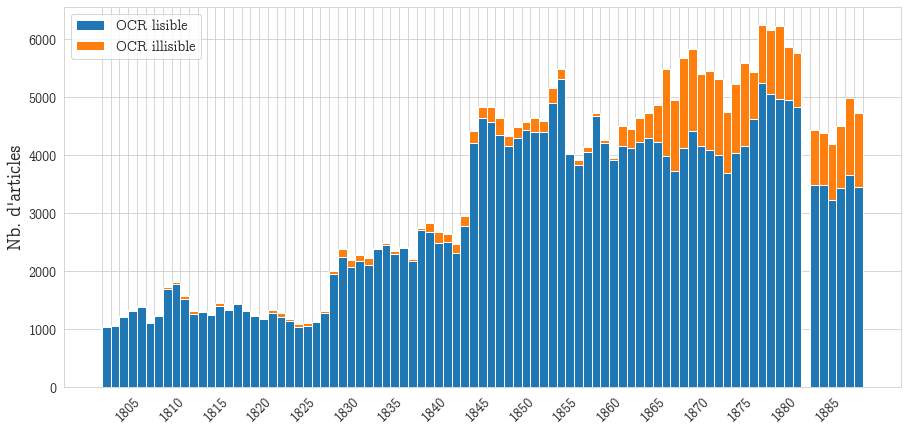

In [11]:
matplotlib.rcParams['font.family'] = 'CMU Concrete'

fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.hist([df.year[df.readability==True], df.year[df.readability==False]],
        bins=bins, stacked=True, label=['OCR lisible', 'OCR illisible'])
plt.grid(b=True, which='both')
plt.yticks(fontsize=14)
plt.xticks(ticks=ticksrange, labels=xlabels, fontsize=14)
plt.tick_params(axis ='x', rotation = 45)
#plt.title('Distribution temporelle des données', fontsize=20)
plt.ylabel("Nb. d'articles", fontsize=18)
plt.legend(fontsize = 14)
sns.set_style(style='ticks')

plt.savefig('../references/memoire/images/readability_histogram.pdf', bbox_inches='tight')

plt.show()


## Text mass

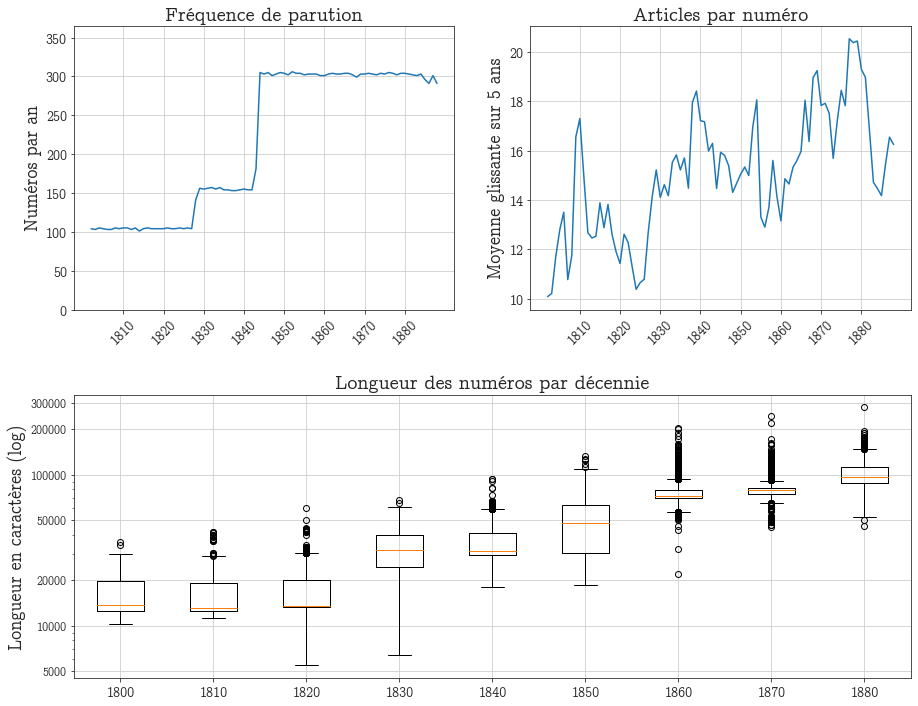

In [14]:
gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(15,12))
#fig.tight_layout(h_pad=5)
matplotlib.rcParams['font.family'] = 'CMU Concrete'

### fréquence de parution
ax1 = plt.subplot(gs[0, 0]) # row 0, col 0
df.groupby('year')['date'].apply(lambda x: len(set(x))).plot()

plt.yticks(ticks=[0,50,100,150,200,250,300,350], fontsize=14)
plt.xticks(ticks=range(1810, 1890, 10), fontsize=14)
ax1.tick_params(axis ='x', rotation = 45)
plt.ylim((0,365))
plt.grid()

plt.ylabel('Numéros par an', fontsize=18)
plt.xlabel(None)
plt.title('Fréquence de parution', fontsize=20)


### articles par numéro
ax2 = plt.subplot(gs[0, 1]) # row 0, col 1
nb_per_year = df[['date', 'year']].groupby('year')['date'].apply(lambda x: len(x.unique()))
art_per_year = df[['date', 'year']].groupby('year')['date'].count()
avg_art_per_nb = art_per_year/nb_per_year
avg_art_per_nb.plot()

plt.grid()
plt.yticks(fontsize=14)
plt.xticks(ticks=range(1810, 1890, 10), fontsize=14)
plt.tick_params(axis ='x', rotation = 45)

plt.ylabel('Moyenne glissante sur 5 ans', fontsize=18)
plt.xlabel(None)
plt.title('Articles par numéro', fontsize=20)


### longueur des articles
ax3 = plt.subplot(gs[1, :]) # row 1, span all columns
df['decade'] = df['year'].apply(lambda x: int(str(x)[:3] + '0'))
#all_data = [df.text_len[(df.decade == x) & (df.text_len>1)].sample(200) for x in df.decade.unique()]
#plt.boxplot(all_data, labels=df.decade.unique())
text_len_data = df[['decade', 'year', 'date', 'text_len']].groupby(['decade','year','date'])['text_len'].sum().to_frame()
all_data = [text_len_data.loc[x]['text_len'] for x in df.decade.unique()]
plt.boxplot(all_data, labels=df.decade.unique())

plt.yscale('log')
plt.yticks([5000, 10000, 20000, 50000, 100000, 200000, 300000], fontsize=12)
plt.xticks(fontsize=14)
plt.grid()
#plt.tick_params(axis ='x', rotation = 45)
plt.gca().get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

plt.ylabel('Longueur en caractères (log)', fontsize=18)
plt.xlabel(None)
plt.title('Longueur des numéros par décennie', fontsize=20)

plt.subplots_adjust(hspace=0.3)
sns.set_style('ticks')
#plt.savefig('../references/memoire/images/text_mass.pdf', bbox_inches='tight')

plt.show()

## Main headings

In [15]:
top_headings = df['heading2'].value_counts()[0:100].to_frame()
top_headings.sum()/len(df)

heading2    0.467248
dtype: float64

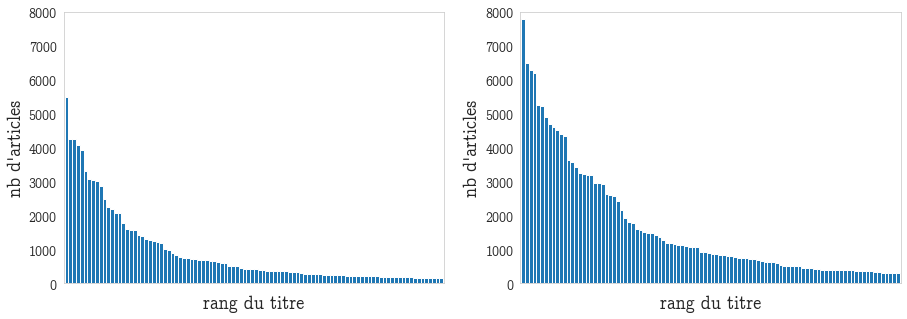

In [42]:
matplotlib.rcParams['font.family'] = 'CMU Concrete'

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

df.heading.value_counts()[:100].plot.bar(ax=ax1, width=1)
ax1.set_ylim(top=8000)
ax1.set_xticklabels('')
ax1.set_ylabel("nb d'articles", fontsize=18)
ax1.set_xlabel("rang du titre", fontsize=18)
ax1.grid(False)

df.heading2.value_counts()[:100].plot.bar(ax=ax2, width=1)
ax2.set_ylim(top=8000)
ax2.set_xticklabels('')
ax2.set_ylabel("nb d'articles", fontsize=18)
ax2.set_xlabel("rang du titre", fontsize=18)
ax2.grid(False)

sns.set_style('whitegrid')

plt.savefig('../references/memoire/images/title_normalisation.pdf', bbox_inches='tight')

plt.show()

In [72]:
def headings_plot(headings, timerange=np.arange(1802,1890), savepath=None, rolling=True, **kwargs):
    
    matplotlib.rcParams['font.family'] = 'CMU Concrete'
    plt.figure(figsize=figsize)
    
    total_articles = df[(df.year >= timerange[0]) & (df.year < timerange[-1])].groupby('year')['year'].count()
    data = []
    for name in headings:
        heading_counts = df[df.heading2 == name].groupby('year')['heading2'].count().reindex(timerange)
        if rolling == True:
            data.append((heading_counts/total_articles).fillna(0).rolling(5, min_periods=1).mean())
        else:
            data.append((heading_counts/total_articles).fillna(0))
            
            
    col = sns.color_palette("tab20", len(headings))
    plt.stackplot(timerange, data, labels=headings, colors=col)
        
    plt.grid(b=True, which='both')
    plt.xticks(ticks=timerange, labels=[str(i) if i%5==0 else '' for i in timerange], fontsize=14)
    plt.tick_params(axis ='x', rotation = 45)
    plt.ylabel('% de tous les articles', fontsize=20)
    plt.yticks(fontsize=14)

    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles[::-1], labels[::-1], fontsize=12, **kwargs)
    sns.set_style('ticks')
    
    if savepath:
        plt.savefig(savepath, bbox_inches='tight')
    
    plt.show()

In [79]:
df.heading2.value_counts()[:30]

Paris                              7771
Neueste Nachrichten                6473
Riga                               6287
London                             6192
Witterungsbeobachtungen in Riga    5242
Wien                               5216
Bekanntmachungen                   4911
St. Petersburg                     4701
Berlin                             4684
Frankreich                         4616
Angekommene Fremde                 4527
Inländische Nachrichten            4388
Deutschland                        4350
Telegramme                         3571
Inland                             3426
Italien                            3246
Inhalt                             3217
Vermischtes                        3195
Groszbritannien und Irland         3190
Tägliche Eisenbahnzüge             2958
Madrid                             2945
Locales                            2939
Ist zu drucken erlaubt...          2621
Oesterreich                        2603
Deutsches Reich                    2560


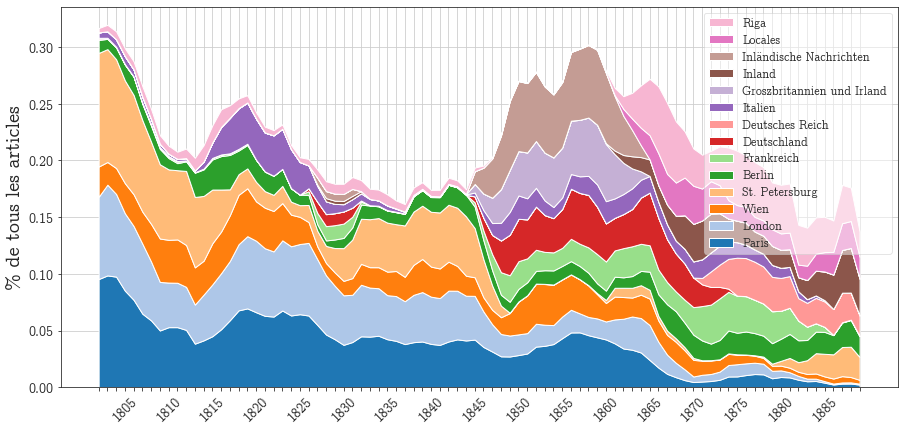

In [89]:
headings_plot(['Paris', 'London', 'Wien', 'St. Petersburg', 'Berlin', 'Frankreich',
               'Deutschland', 'Deutsches Reich', 'Italien', 'Groszbritannien und Irland', 'Inland',
               'Inländische Nachrichten', 'Locales', 'Riga'],
              framealpha=0.5,
              savepath='../references/memoire/images/headings_places.pdf')

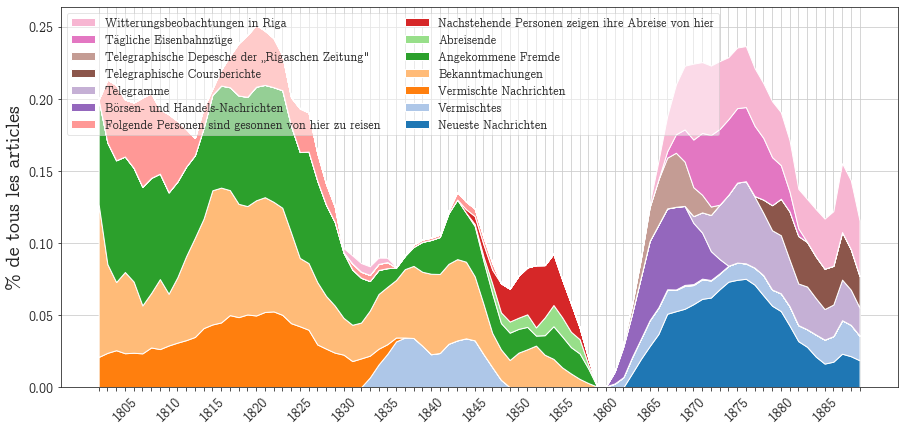

In [92]:
headings_plot(['Neueste Nachrichten',
               'Vermischtes',
               'Vermischte Nachrichten',
               'Bekanntmachungen',
               'Angekommene Fremde',
               'Abreisende',
               'Nachstehende Personen zeigen ihre Abreise von hier',
               'Folgende Personen sind gesonnen von hier zu reisen',
               'Börsen- und Handels-Nachrichten',
               'Telegramme',
               'Telegraphische Coursberichte',
               'Telegraphische Depesche der „Rigaschen Zeitung"',
               'Tägliche Eisenbahnzüge',
               'Witterungsbeobachtungen in Riga'],
              rolling=True, framealpha=0.5, loc='upper left', ncol=2,
              savepath='../references/memoire/images/headings_other.pdf')

In [25]:
# How many headings have been replaced

heading_replacement_dict = {
            'Witterungs-Beobachtungen in Riga': 'Witterungsbeobachtungen in Riga',
            'Witterungs- Beobachtungen in Riga': 'Witterungsbeobachtungen in Riga',
            'Meteorologische Beobachtungen in Riga': 'Witterungsbeobachtungen in Riga',
            'Witterungs- Beobachtungen in Riga': 'Witterungsbeobachtungen in Riga',
            'Witterungs -Beobachtungen in Riga': 'Witterungsbeobachtungen in Riga',
            'Witterunsbeobachtungen in Riga': 'Witterungsbeobachtnogen in Riga',
            'Groszbritannien und Irland': 'Großbritannien und Irland',
            'Grossbritannien und Irland': 'Großbritannien und Irland',
            'Grosbritannien und Irland': 'Großbritannien und Irland',
            'Todes – Anzeige': 'Todes-Anzeige',
            'Todes– Anzeige': 'Todes-Anzeige',
            'Todes-Anzeigen': 'Todes-Anzeige',
            'Todes – Anzeigen': 'Todes-Anzeige',
            'Telegraphische Nachrichten': 'Telegramme',
            'Lokales': 'Locales',
            'Börsen- und Handels – Nachrichten': 'Börsen- und Handels-Nachrichten',
            'Börsen – und Handels – Nachrichten': 'Börsen- und Handels-Nachrichten',
            'Börsen und Handels-Nackrichten': 'Börsen- und Handels-Nachrichten',
            'Börsen – und Handels – Nachrichten': 'Börsen- und Handels-Nachrichten',
            'Telegraphische Depesche der „Rigaschen Zeitung"': 'Telegramme der „Rigaschen Zeitung"',
            'Witterungs-Telegramme': 'Telegraphische Witterungsberichte',
            'Vermischte Nachrichten': 'Vermischtes',
            'Tägliche Eisenbahuzüge': 'Eisenbahnzüge',
            'Tägliche – Eisenbahnzüge': 'Eisenbahnzüge',
            'Telegr. Berichte über den Barometerstand': 'Telegraphische Witterungsberichte',
            'Inländische Nachrichten': 'Inland',
            'Inlandische Nachrichten': 'Inland',
            'Telegr. der Rig. Telegraphen Agentur': 'Telegramme',
            'Folgende Personen sind gesonnen, von hier zu reise': 'Abreisende',
            'Nachstehende Personen zeigen ihre Abreise von hier': 'Abreisende',
            'Tägliche – Eisenbahnzüge': 'Eisenbahnzüge',
            'Deutsches «eich': 'Deutsches Reich',
            'Neueste Rachrichten': 'Neueste Nachrichten',
            'Neuste Nachrichten': 'Neueste Nachrichten',
                }

repl_keys = list(heading_replacement_dict.keys())
repl_values = pd.Series(list(heading_replacement_dict.values()))
headings = df['heading'] = df['heading'].str.strip('.').str.strip(',').str.strip(' ')

print(len(repl_keys))
print(len(repl_values.unique()))


replaced = 0

for entry in headings:
    if entry in repl_keys:
        replaced += 1
        
print(replaced)

In [42]:
heading_repl = pd.DataFrame({
    'Forme originelle' : list(heading_replacement_dict.keys()),
    'Forme normalisée' : list(heading_replacement_dict.values())
}).set_index('Forme originelle')

print(heading_repl[:10].to_latex())

\begin{tabular}{ll}
\toprule
{} &                 Forme normalisée \\
Forme originelle                      &                                  \\
\midrule
Witterungs-Beobachtungen in Riga      &  Witterungsbeobachtungen in Riga \\
Witterungs- Beobachtungen in Riga     &  Witterungsbeobachtungen in Riga \\
Meteorologische Beobachtungen in Riga &  Witterungsbeobachtungen in Riga \\
Witterungs -Beobachtungen in Riga     &  Witterungsbeobachtungen in Riga \\
Witterunsbeobachtungen in Riga        &  Witterungsbeobachtnogen in Riga \\
Groszbritannien und Irland            &        Großbritannien und Irland \\
Grossbritannien und Irland            &        Großbritannien und Irland \\
Grosbritannien und Irland             &        Großbritannien und Irland \\
Todes – Anzeige                       &                    Todes-Anzeige \\
Todes– Anzeige                        &                    Todes-Anzeige \\
\bottomrule
\end{tabular}



# M1 archive

In [2]:
# Importing a modified dataset (has year, date columns, word counts etc.)

input_path = '../data/processed/LNB_processed.xlsx'
df = pd.read_excel(input_path)
df.head()

,date,year,month,day,pub,head,full_text,href,text_len,w_count,sturm,hagel,überschwemmung
0,1800.01.14,1800,1,14,Mitausche Zeitung,"St. Petersburg, vom 23. December","St. Petersburg, vom 23. December\n\nHfsxs xseb...",http://periodika.lv/viewerOpener?issue=/mize18...,10770,1273,True,False,False
1,1800.02.25,1800,2,25,Mitausche Zeitung,Bekanntmachungen,"Bekanntmachungen\n\nDa, ohngeathtet wiederhplt...",http://periodika.lv/viewerOpener?issue=/mize18...,3002,339,True,False,False
2,1800.03.15,1800,3,15,Mitausche Zeitung,Mitau,"Mitau\nMitau\n\n« Midas, den IF. März. Zrgolge...",http://periodika.lv/viewerOpener?issue=/mize18...,10370,1209,True,False,False
3,1800.03.29,1800,3,29,Mitausche Zeitung,Mitau,"Mitau\nMitau\n\nl ·»»xkl,litau, vom gckMörzk D...",http://periodika.lv/viewerOpener?issue=/mize18...,11972,1497,True,False,False
4,1800.04.02,1800,4,2,Rigische Anzeigen,Publicationes.,Publicationes.\n\n?ur Ergänzung der Allerhöchs...,http://periodika.lv/viewerOpener?issue=/p_003_...,7306,860,True,False,False


## Temporal analysis

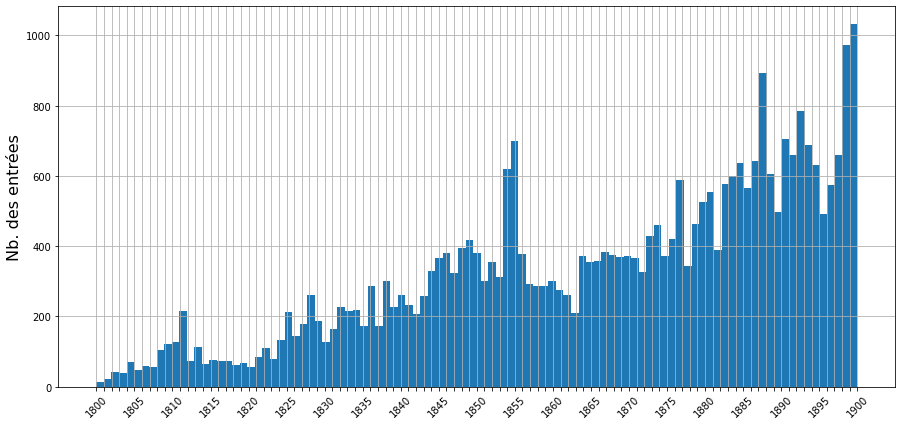

In [3]:
figsize = (15,7)
bins = 101
ticksrange = np.arange(1800,1901)
xlabels = [num if num%5==0 else '' for num in np.arange(1800,1901)]

plt.figure(figsize=figsize)
plt.hist(df.year,bins=bins)
plt.grid(b=True, which='both')
plt.xticks(ticks=ticksrange, labels=xlabels)
plt.tick_params(axis ='x', rotation = 45)
#plt.title('Distribution temporelle des données', fontsize=20)
plt.ylabel('Nb. des entrées', fontsize=16)

plt.savefig('../references/memoire_M1/figures/distribution_temp_journaux.png', bbox_inches='tight')

plt.show()

As expected, the general tendency follows the increase in press volume: newspaper get longer and are published more often, the number of publications grows steadily. Thus, more information over the course of the 19th century.

## Different periodicals and their proportions

In [6]:
print(f'There are {len(df.pub.unique())} different periodicals in the dataset.')

There are 46 different periodicals in the dataset.


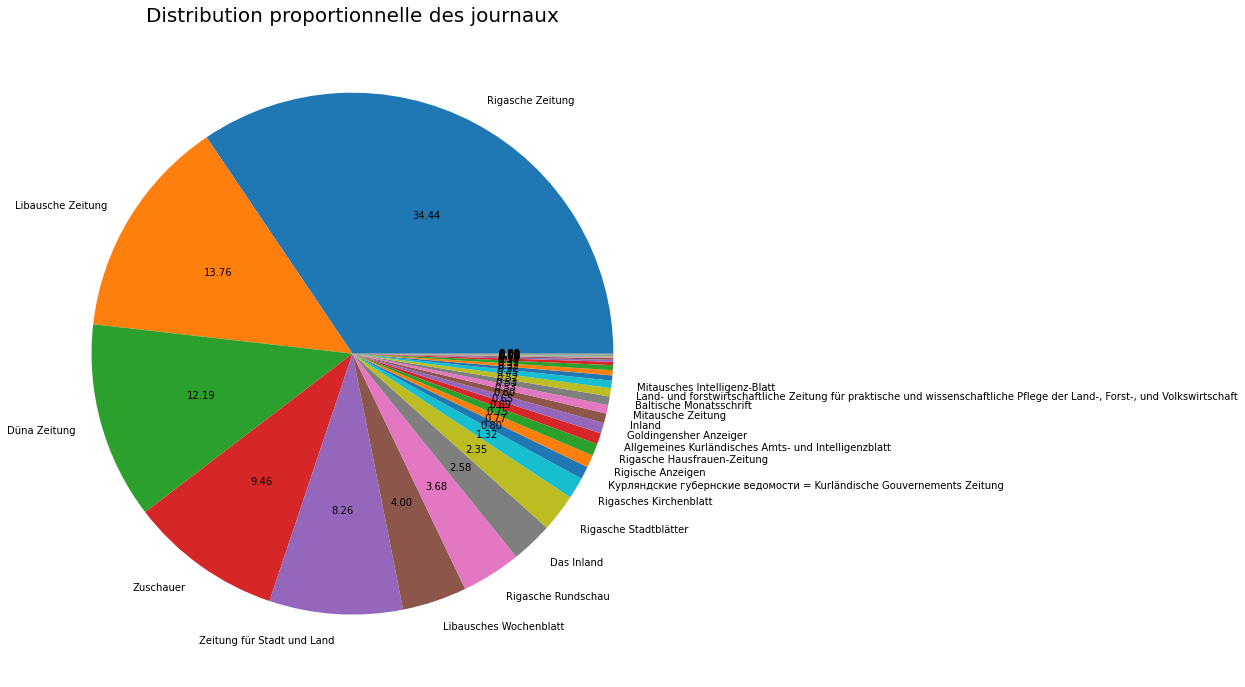

In [7]:
### print a pie chart to show the proportions of different periodicals

# create x(data) and y(labels)
pub_pie_data = df.pub.value_counts()
pub_pie_labels = pub_pie_data.index.tolist()
# remove half of the labels to make the plot more readable
pub_pie_labels[-26:] = ['']*26

plt.figure(figsize=(12,12))
plt.pie(pub_pie_data, labels=pub_pie_labels, autopct='%.2f')
plt.title('Distribution proportionnelle des journaux', fontsize=20)

plt.show()

In [8]:
### group dataframe to observe the changing of the proportions of different periodicals
dfpub = df.groupby(['pub', 'year']).size().reset_index(name='obs')

In [9]:
# Generating lineplots for all 46 periodicals is time-consuming, so we'll do this automatically

# function to generate the number of entries/year for a periodical. needs a grouped dataframe dfpub to be present
def generate_pub_freq(pub_name, timespan):
    freqs = []
    for year in timespan:
        try:
            freqs.append(dfpub.obs[(dfpub.pub == pub_name) & (dfpub.year == year)].values[0])
        except:
            freqs.append(0)
    return freqs


# this is a generator that takes the original dataframe as input
def plot_pub_data(dataframe):
    
    df = dataframe.groupby(['pub', 'year']).size().reset_index(name='obs')
    publications = df.pub.unique()
    x_range = np.arange(1800,1901)
    
    for pub in publications:
        pub_y_data = generate_pub_freq(pub, x_range)
        annotation_x_coord = dfpub.year[(dfpub.pub == pub) &
                                        (dfpub.obs == max(dfpub.obs[dfpub.pub == pub]))].values[0]
        annotation_y_coord = max(dfpub.obs[dfpub.pub == pub])
        
        if dataframe.pub.value_counts()[pub] > 300: #add annotation labels for the most prominent publications
            annotation_text = pub
        else:
            annotation_text = ''
        
        yield plt.plot(x_range, pub_y_data), plt.annotate(text=annotation_text, xy=(annotation_x_coord, annotation_y_coord))

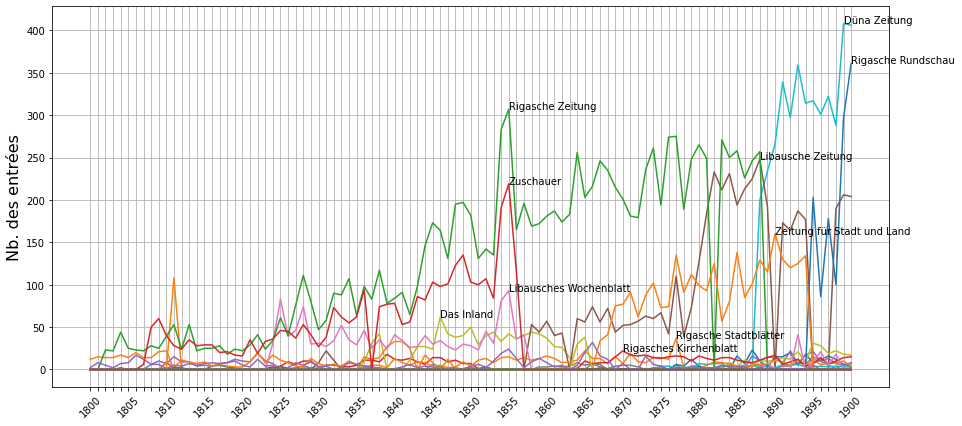

In [112]:
# create line plot for all periodicals

plt.figure(figsize=figsize)
# get the plots from generator
[plot for plot in plot_pub_data(df)]

plt.grid(b=True, which='both')
plt.xticks(ticks=ticksrange, labels=xlabels)
plt.tick_params(axis ='x', rotation = 45)
#plt.title('Distribution temporelle des différents journaux', fontsize=20)
plt.ylabel('Nb. des entrées', fontsize=16)

plt.savefig('../references/memoire_M1/figures/distribution_proportionnelle_journaux.png', bbox_inches='tight')

plt.show()





## General textual tendencies

### Text length in characters and words

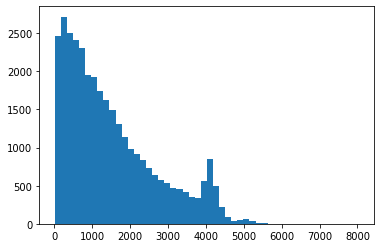

In [25]:
plt.figure()
plt.hist(df.w_count, bins=50)
plt.savefig('../references/memoire_M1/figures/w_count.png', bbox_inches='tight')
plt.show()

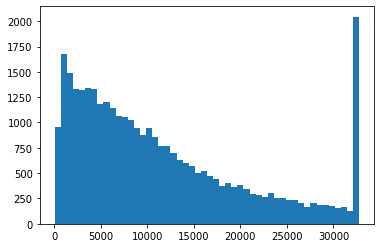

In [26]:
plt.figure()
plt.hist(df.text_len, bins=50)
plt.savefig('../references/memoire_M1/figures/text_len.png', bbox_inches='tight')
plt.show()

In [13]:
print(f'The correlation between text length in characters and in words is {df.text_len.corr(df.w_count).round(5)}')

The correlation between text length in characters and in words is 0.99449


As the graphs show, there is a spike in both the word count and character count. Because the correlation is almost 1, it seems that the texts with an unreasonably high number of characters (see second plot) correspond with the spike in the first graph (around 4000 words). I think that this may be due to OCR that sometimes erroneusly generates long sequences of gibberish.

#### Anomalous long texts

In [14]:
longest_texts = df[df.text_len == max(df.text_len)]
print(f'There are {len(longest_texts)} longest entries that all have {max(df.text_len)} characters.')
print('\n')
print('Exploration of some anomalous entries:')
for entry in longest_texts.iloc[np.random.randint(0, high=(len(longest_texts)), size=5)].href:
    print(entry)

There are 1918 longest entries that all have 32767 characters.


Exploration of some anomalous entries:
http://periodika.lv/viewerOpener?issue=/p_003_lzpo1885n068&article=DIVL32&query=%C3%9Cberschwemmung
http://periodika.lv/viewerOpener?issue=/p_003_rzei1888s01n159&article=DIVL13&query=%C3%9Cberschwemmungen
http://periodika.lv/viewerOpener?issue=/p_003_lzpo1885n099&article=DIVL17&query=Hagel
http://periodika.lv/viewerOpener?issue=/p_003_duze1897s01n259&article=DIVL73&query=st%C3%BCrmen
http://periodika.lv/viewerOpener?issue=/p_003_inla1859s01n48&article=DIVL54&query=%C3%9Cberschwemmungen


It seems that certain articles have faulty or missing segmentation. 32767 characters is likely the upper bound of characters for periodika.lv

### What are the most widespread article names?

In [114]:
print('Top 30 most common article names are:')
print(df['head'].str.strip('.').value_counts()[0:30]) #Strip '.' from end of article names

Top 30 most common article names are:
Inland                           3131
Ausland                          2862
Locales                          1366
Vermischtes                      1031
Frankreich                        562
Lokales                           532
Feuilleton                        445
Telegramme                        387
St. Petersburg                    379
Deutschland                       376
Handel und Verkehr                370
Neueste Nachrichten               364
Vermischte Nachrichten            338
Rigasche Zeitung                  313
Bekanntmachungen                  295
Inländische Nachrichten           290
Riga                              254
Oesterreich                       249
Rigasche Rundschau                243
Italien                           219
Orientalische Angelegenheiten     199
England                           180
Miscellen                         163
Deutsches Reich                   141
Inhalt                            139
Korresponden

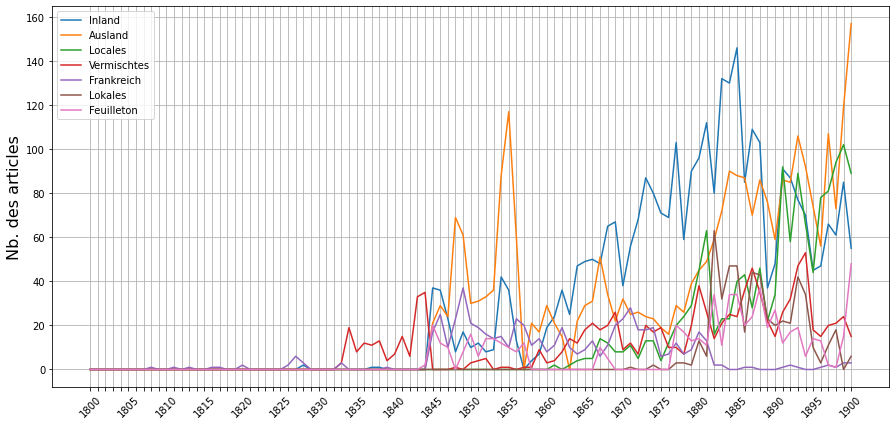

In [131]:
def article_head_counter(name, df, timerange):
    return [len(df[(df.year == i) & (df['head'].str.contains(name))]) for i in timerange]

plt.figure(figsize=figsize)

for name in df['head'].str.strip('.').value_counts().keys()[0:7]:
    plt.plot(np.arange(1800,1901), article_head_counter(name, df, np.arange(1800,1901)), label=name)
    
plt.grid(b=True, which='both')
plt.xticks(ticks=ticksrange, labels=xlabels)
plt.tick_params(axis ='x', rotation = 45)
plt.ylabel('Nb. des articles', fontsize=16)
plt.legend()

plt.savefig('../references/memoire_M1/figures/distribution_titres.png', bbox_inches='tight')

plt.show()

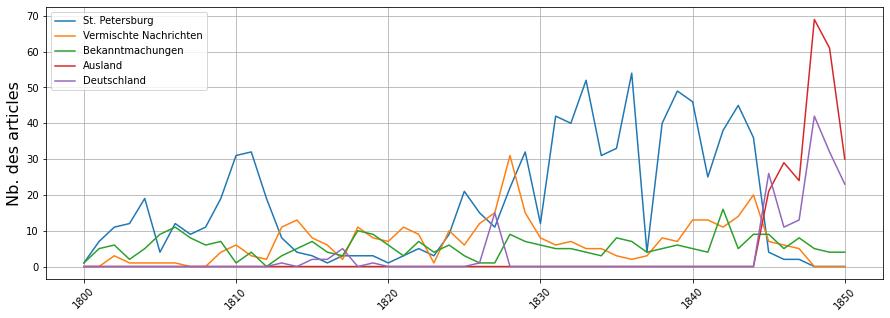

In [132]:
plt.figure(figsize=(15,5))

for name in df[df.year < 1851]['head'].str.strip('.').value_counts().keys()[0:5]:
    plt.plot(np.arange(1800,1851), article_head_counter(name, df[df.year < 1851], np.arange(1800,1851)), label=name)
    
plt.grid(b=True, which='both')
plt.tick_params(axis ='x', rotation = 45)
plt.ylabel('Nb. des articles', fontsize=16)
plt.legend()

plt.savefig('../references/memoire_M1/figures/titres_1800_1850.png', bbox_inches='tight')

plt.show()

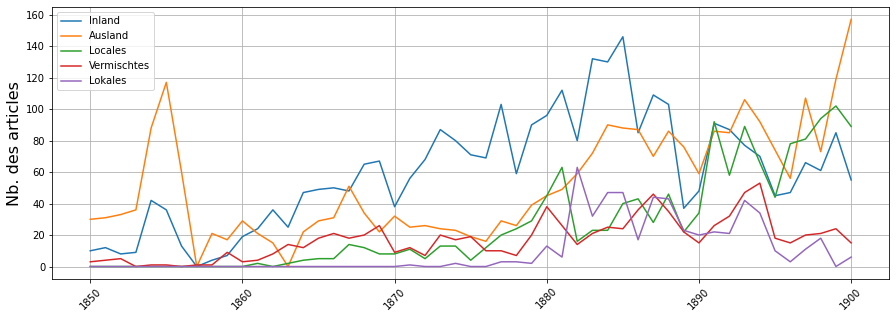

In [134]:
plt.figure(figsize=(15,5))

for name in df[df.year >= 1850]['head'].str.strip('.').value_counts().keys()[0:5]:
    plt.plot(np.arange(1850,1901), article_head_counter(name, df[df.year >= 1850], np.arange(1850,1901)), label=name)
    
plt.grid(b=True, which='both')
plt.tick_params(axis ='x', rotation = 45)
plt.ylabel('Nb. des articles', fontsize=16)
plt.legend()

plt.savefig('../references/memoire_M1/figures/titres_1850_1900.png', bbox_inches='tight')

plt.show()

### Most common words in article names

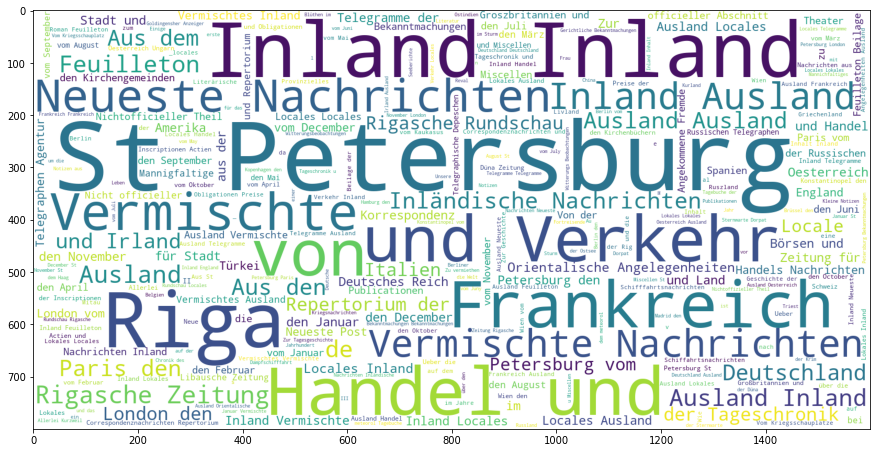

In [16]:
from wordcloud import WordCloud

wordcloud_text = ''
for entry in df['head'].str.strip('.'):
    wordcloud_text += entry
    wordcloud_text += '\n'

wordcloud = WordCloud(background_color="white",
                      width=1600,
                      height=800,
                      max_words=300,
                      contour_width=3,
                      contour_color='firebrick').generate(wordcloud_text)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)

plt.show()

Many articles obviously come from specific locations. The strong presence of St. Petersburg and Riga does not necessarily reflect the content of the news with these titles. Rather, the name of a city was used in the article title when the information in question had arrived from that location, regardless of what was actualy reported (e.g. an article that has 'St. Petersburg' in the title can actually be about events in Moscow, etc.). The newspapers use similar, but not identical title schemes. For example, the section "Inland" (~"domestic") could mean the the Baltic Provinces  or the Russian Empire (in the latter case, the Baltic Provinces are usually under the section "Locales").

To help narrow down the search for true positives, it is possible to disregard certain titles completely. For example, "Ausland" or different titles with foreign country/city names in them.

## Exploring the keywords

In [17]:
# group data into series that shows frequency of keyword for each year
df_st = df.groupby('year')['sturm'].apply(lambda x: x[x == True].count())
df_hg = df.groupby('year')['hagel'].apply(lambda x: x[x == True].count())
df_ub = df.groupby('year')['überschwemmung'].apply(lambda x: x[x == True].count()) 

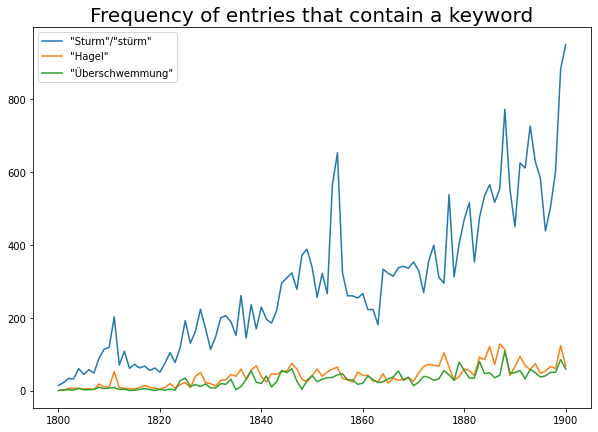

In [18]:
time = np.arange(1800,1901)

plt.figure(figsize=(10,7))

plt.plot(time, df_st.values, label='"Sturm"/"stürm"')
plt.plot(time, df_hg.values, label='"Hagel"')
plt.plot(time, df_ub.values, label='"Überschwemmung"')
plt.legend()
plt.title('Frequency of entries that contain a keyword', fontsize=20)
plt.savefig('../temp/keywordfreq.jpg', dpi=300)
plt.show()


As we can see, the keyword "Sturm" makes up about 90% of the data. This is very certainly due to the metaphorical usages of the word. It is likely that only a small proportion of the storm-keywords are true positives.
It is also interesting to note that the storm-keyword frequency appears to increase more drastically in time.

Future options of using the presence of keywords can be following:
- A co-occurrence of two or more keywords represents a higher probability of a weather event